### 关于数据集 | About Dataset

https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data

#### 背景 | Context

What’s the best (or at least the most popular) Halloween candy?

#### 内容 | Content

在Candy.csv中包含了每种糖果的属性及其排名。对于二元变量，1表示“是”，0表示“否”。

- chocolate: Does it contain Chocolate?
  - 是否含有巧克力
- fruity: Is it fruit flavored?
  - 是否是水果味的？
- caramel: Is there caramel in the candy?
  - 是否含有焦糖？
- peanutalmondy (peanuts, peanut butter, almonds)
  - 花生杏仁类（是否含有花生、花生酱或杏仁？）
- nougat: Does it contain nougat?
  - 是否含有牛轧糖？
- crispedricewafer (crisped rice, wafers, cookie)
  - 脆米威化饼（是否含有脆米、威化饼或饼干成分？）
- hard: Is it a hard candy?
  - 是否坚硬？
- bar: Is it a candy bar?
  - 是否是棒状的？
- pluribus: Is it one of many candies in a bag or box?
  - 是否是一袋或一盒中的一个？
- sugarpercent: The percentile of sugar it falls under within the data set.
  - 含糖量百分比：在数据集中其含糖量所处的百分比区间。
- pricepercent: The unit price percentile compared to the rest of the set.
  - 价格百分比：与该组其他产品相比的单价百分位数。
- winpercent: The overall win percentage according to 269,000 matchups.
  - 胜率：根据26.9万投票得出的总胜率。

---

#### 主要目标 | Paimary objective

- 通过利用不同的分类模型，并结合糖果的附加特征，来预测该糖果是否以巧克力为基础。

- Utilizing a different classification Model to predict whether a candy is Chocolate-based, leveraging its additional features.


---

### 实例

---

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


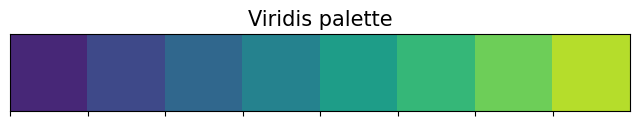

In [96]:
def viridis_palette():
    sns.palplot(sns.color_palette("viridis", 8))
    plt.title("Viridis palette", fontsize = 15)
    plt.show()

viridis_palette()

In [97]:
df = pd.read_csv("Candy.csv")


---

#### 1.数据预处理 | Data Preprocessing

---

In [98]:
df.head().style.background_gradient(cmap = "viridis").hide(axis = "index")

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465


In [99]:
df.isnull().sum()


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Luckily, we don't have any missing values.

In [100]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


---

#### 2.探索性数据分析 | Exploratory Data Analysis

---

This will be an EXPLORATORY (探索性) visualization, as opposed to EXPLANATORY (解释性).


Rename the columns for better understanding and aesthetics.

In [101]:
mapping = {
    "competitorname": "Candy Name",
    "chocolate": "Chocolate",
    "fruity": "Fruity",
    "caramel": "Caramel",
    "peanutyalmondy": "Peanuts & Nuts",
    "nougat": "Nougat",
    "crispedricewafer": "Crispy",
    "hard": "Hard Candy",
    "bar": "Candy Bar",
    "pluribus": "Multi-piece",
    "sugarpercent": "Sugar Percentage",
    "pricepercent": "Price Percentage",
    "winpercent": "Win Percentage",
}
df = df.rename(columns = mapping)


In [102]:
df.head().style.background_gradient(cmap = "viridis").hide(axis = "index")


Candy Name,Chocolate,Fruity,Caramel,Peanuts & Nuts,Nougat,Crispy,Hard Candy,Candy Bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465


In [103]:
def plot_choc_candy_ratio(df):
    
    choc_ratio = df["Chocolate"].mean().round(2)
    candy_ratio = 1 - choc_ratio

    fig, ax = plt.subplots(figsize = (8, 2))

    ax.barh([''], [candy_ratio], color = "#472777", alpha = 0.9, label = "Candy")
    ax.barh([''], [choc_ratio], left=[candy_ratio], color = "#35b778", alpha = 0.9, label = "Chocolate")

    ax.annotate(
        f"{int(candy_ratio * 100)}%", 
        xy = (candy_ratio / 2, 0), 
        ha = "center",
        va = "center",
        color = "white", fontsize = 40, fontfamily = "serif"
    )
    ax.annotate(
        f"{int(choc_ratio * 100)}%",
        xy = (candy_ratio + choc_ratio / 2, 0),
        ha = "center",
        va = "center",
        color = "white", fontsize = 40, fontfamily = "serif"
    )

    ax.set_title("Candy & Chocolate", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.legend(loc = "upper center", fontsize = 15, bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()


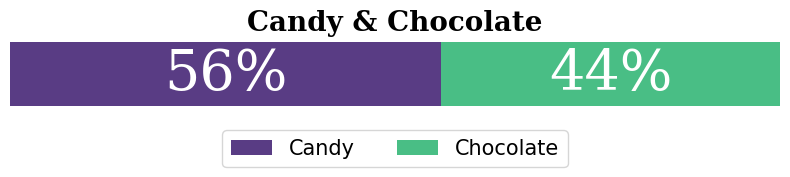

In [104]:
plot_choc_candy_ratio(df)


Exploring Data Connections: Correlation Heatmap

Let's delve into the relationships between variables and uncover factors influencing our analysis

In [105]:
def plot_correlation_heatmap(df):

    df_numeric = df.select_dtypes(include = ["number"])

    corr = df_numeric.corr()

    mask = np.triu(np.ones_like(corr, dtype = bool))

    plt.figure(figsize = (10, 8))

    cmap = sns.color_palette("viridis", as_cmap = True)

    sns.heatmap(
        corr, mask = mask, cmap = cmap,
        vmax = .4, vmin = -.4, center = 0,
        square = True, linewidths = 1,
        annot = True,
        fmt = ".2f",
        cbar_kws = {"shrink": .8}
    )

    plt.title("Correlation Heatmap", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()


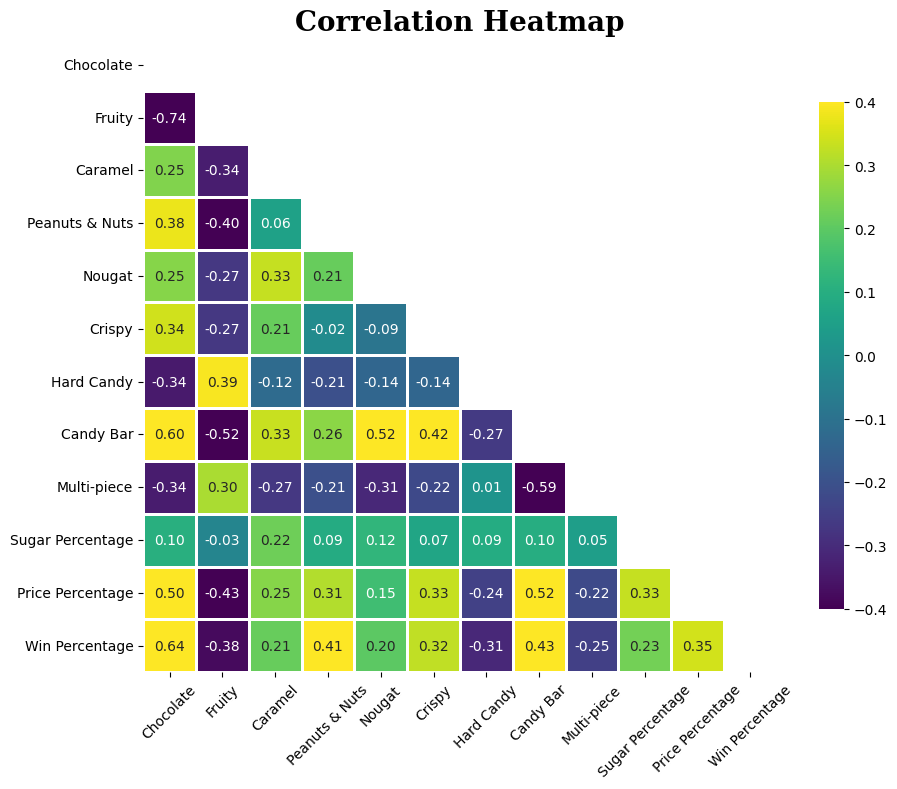

In [106]:
plot_correlation_heatmap(df)


---

##### 观察 | Observation

**正相关关系：**  
- 巧克力与糖果棒之间存在强正相关  
  - 巧克力与糖果棒之间的强正相关系数表明，人们更倾向于选择以糖果棒形式存在的巧克力。

**中等相关性：**  
- 价格和胜率与巧克力及糖果棒呈中等程度正相关：  
  - 这表明较高的价格和更高的受欢迎程度（胜率）通常与这两类产品相关。  
    - 这说明高端或高品质的巧克力产品（如糖果棒）可能定价更高，并更受消费者欢迎。

**负相关关系：**  
- 水果味与巧克力呈负相关，表明水果味产品较少以巧克力形式出现。  
- 多件装与糖果棒呈负相关，说明糖果棒通常不是多件包装形式。  
- 同样，硬糖与糖果棒呈负相关，表明糖果棒不太可能是硬糖类型。

**弱相关性：**  
- 一些特征（如牛轧糖和含糖量百分比）与其他特征之间的相关性较弱，表明它们对巧克力或糖果棒的存在与否影响较小。

---

**Positive Correlation:**
- Strong Positive Correlation between Chocolate and Candy bar
  - The strong positive correlation coefficient between Chocolate with bar suggests that people perfer the chocolates which are more likely to be bars.

**Moderate Positive Correlation:**
- Moderate Correlation of Price and Win Percentage with Chocolate and Candy bar:
  - This indicate that higher prices and win percentages are associated with these product categories.
    - This suggests that premium or high-quality chocolate products, such as candy bars, may command higher prices and popular among consumers.

**Negative Correlation:**
- Fruity Flavor shows a negative correlation with Chocolate, indicating that fruity-flavored products are less likely to be chocolates.
- Multi-piece has a negative correlation with Candy bar, suggesting that candy bars are less likely to come in multiple pieces.
- Similarly, Hard Candy has a negative correlation with Candy bar, indicating that candy bars are less likely to be hard candies.

**Weak Correlations:**
- Some features, such as Nougat and Sugar Percentage, have weak correlations with other features, suggesting that they may not strongly influence the presence of chocolate or candy bars.

---

**分析糖果的各种二元属性（如是否含巧克力、是否有坚果等）对胜率的影响**，量化每个属性对糖果获胜概率的贡献度。

**核心原理：**
基于 "平均胜率差异" 的统计方法。
1. 计算所有糖果的 **整体平均胜率（基准值）**
2. 对于每个属性：
   - 筛选出 **具有该属性（值为1）** 的糖果子集
   - 计算这些糖果的 **平均胜率**
   - 对比基准： $$\text{属性影响值} = \text{属性平均胜率} - \text{整体平均胜率}$$
3. 正值表示该属性 **提升胜率**，负值表示 **降低胜率**

In [140]:
def analyze_win_factors(df):
    """
    分析哪些属性对糖果胜率有贡献
    
    参数:
    df (DataFrame): 包含糖果属性和胜率的数据集
    
    返回:
    DataFrame: 展示属性对胜率影响的图表和数据
    """
    # 计算整体平均胜率作为基准
    overall_avg = df["Win Percentage"].mean()
    result_data = []

    # 获取所有属性列，跳过名称列
    attributes = [col for col in df.columns if col != "Candy Name"]

    for attr in attributes:
        
        # 跳过非二元属性（除了胜率本身）
        if df[attr].dtype != "int64" and attr != "Win Percentage":
            continue

        # 对于二元属性，计算当属性存在时( = 1)的影响
        if df[attr].isin([0, 1]).all():

            # 获取具有该属性的糖果
            filtered = df[df[attr] == 1]

            # 如果没有糖果具有此属性，则跳过
            if len(filtered) == 0:
                continue

            # 计算具有该属性的糖果的平均胜率和影响值
            avg_win = filtered["Win Percentage"].mean()
            impact = avg_win - overall_avg

            result_data.append({
                "Attribute": attr,
                "Avg Win %": round(avg_win, 2),
                "Impact %": round(impact, 2)
            })
    
    # 创建结果数据框并按影响值排序
    result_df = pd.DataFrame(result_data)
    result_df = result_df.sort_values("Impact %", ascending = False)

    plt.figure(figsize = (14, 8))

    bars = plt.barh(
        result_df["Attribute"],
        result_df["Impact %"],
        color = plt.cm.viridis(np.linspace(0, 0.8, len(result_df)))
    )

    for bar in bars:
        width = bar.get_width()
        label_x_pos = width if width > 0 else width
        align = "left" if width > 0 else "right"
        plt.text(
            label_x_pos,
            bar.get_y() + bar.get_height() / 2,
            f"{"+" if width > 0 else ""}{width:.2f}",
            va = "center",
            ha = align
        )
    
    plt.axvline(x = 0, color = "black", linestyle = "-", alpha = 1)
    plt.xlabel("Impact on Win Percentage (%)", fontsize = 15, fontfamily = "serif")
    plt.title("Attribute Impact on Win Percentage (%)", fontsize = 20, fontweight = "bold", fontfamily = "serif")

    plt.tight_layout()
    plt.show()
    
    print(f"The overall average win percentage is {overall_avg:.2f}%")

    return result_df


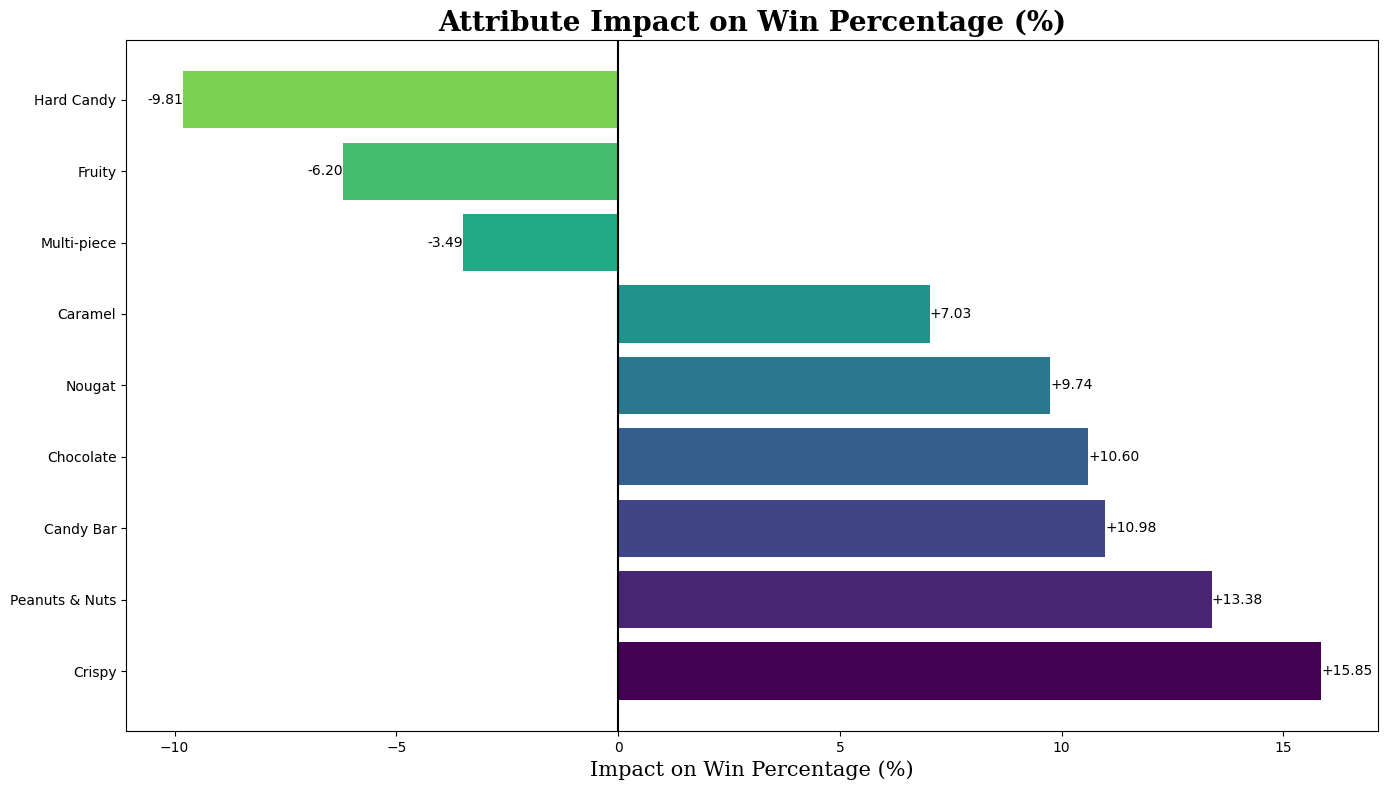

The overall average win percentage is 50.32%


In [141]:
result_df = analyze_win_factors(df)


In [142]:
result_df


,Attribute,Avg Win %,Impact %
5,Crispy,66.17,15.85
3,Peanuts & Nuts,63.70,13.38
7,Candy Bar,61.30,10.98
0,Chocolate,60.92,10.60
4,Nougat,60.05,9.74
2,Caramel,57.35,7.03
8,Multi-piece,46.82,-3.49
1,Fruity,44.12,-6.20
6,Hard Candy,40.51,-9.81


---

##### 观察 | Observation

上表生动地揭示了不同糖果成分如何影响其在大众中的受欢迎程度。
- 巧克力糖果一马当先，可将其胜率大幅提升约10个百分点。
- 糖果棒和含坚果的甜点紧随其后，同样带来显著优势。
- 令人意外的是，含有威化或米花的酥脆糖果效果最为突出，可将胜率提高近16个百分点。
- 焦糖和牛轧糖虽为风味增色不少，但多件装糖果却难以维持吸引力。
- 水果味糖果则面临较大阻力，会明显拉低胜率，而硬糖的劣势最为明显。

然而，真正的秘诀在于成分的组合。以广受欢迎的士力架为例——它融合了巧克力、花生、焦糖和牛轧糖，打破了单一成分的局限，实现了超过70%的超高胜率。

这提醒我们，在糖果的世界里，制胜关键不仅在于使用了哪些原料，更在于它们如何巧妙结合，创造出令人无法抗拒的美味体验。

---

The table above paints a fascinating picture of how different candy ingredients affect their chances of winning over the crowd. 
- Chocolate candies lead the pack, giving a solid boost of around 10 points to their win percentage. 
- Candy bars and nutty treats follow closely, offering a sweet advantage. 
- Surprisingly, crispy candies with wafers or rice pack the biggest punch, lifting win percentage by nearly 16 points. 
- While Caramel and Nougat add some flavor to the mix, multi-piece candies struggle to maintain momentum. 
- Fruit-flavored candies face a tough crowd, dragging down win percentage, while Hard candy candies take the biggest hit. 

But the real magic lies in combinations. Consider the beloved Snickers—its blend of Chocolate, peanuts, Caramel, and Nougat defies expectations, delivering a win rate of over 70%. 
 
It's a reminder that in the world of candy, it's not just about the ingredients but how they come together to create something truly irresistible.

---